# A hierarchical clustering of the top 100 places to travel in the world based on term-document matrix 
text origin: http://vacationadvice101.com/travel-bucket-list-100-places-to-visit-before-you-die/

In [1]:
import numpy
import pandas as pd
import nltk
import re

In [1]:
places = open('places.txt').read().split('\n')
reasons = open('reasons.txt').read().split('\n')
print(str(len(places)) + ' places')
print(str(len(reasons)) + ' reasons')
print(places[:])
print(reasons[2])

100 places
100 reasons
['Bora Bora', 'Rio de Janeiro', 'Budapest', 'Registan Square', 'Patagonia', 'Beijing', 'Isle of Man', 'Vancouver BC', 'Antibes', 'Krabi', 'Teotihuacan', 'Cartagena', 'Hue', 'Copenhagen', 'Tikal', 'The Isle of Wight', 'Tuscany', 'Buenos Aires', 'Dubrovnik', 'Sydney', 'The Potala Palace', 'Tasmania', 'Bermuda', 'London', 'Reykjavik', 'Barbados', 'Guilin', 'Tallinn', 'Machu Picchu', 'Salar de Uyuni', 'Niagara Falls', 'Santorini', 'Mykonos', 'Las Vegas', 'The Taj Mahal in Agra', 'Seychelles', 'Hong Kong', 'Dubai', 'Great Wall of China', 'Pyramids of Giza', 'Red Square/Moscow', 'Stonehenge in Wiltshire', 'Shanghai', 'Angkor Archaeological Park', 'Ayers Rock', 'Chichen Itza', 'New York City', 'Washington D.C.', 'Tokyo', 'Mumbai', 'Jeju Island', 'Berlin', 'Edinburgh', 'Easter Island', 'Maldive Islands', 'Petra', 'Paris', 'Grand Canyon', 'Rome', 'Vatican City', 'Mexico City', 'Amritsar', 'Jerusalem', 'Dead Sea', 'Darwin City', 'Svalbard', 'Walt Disney World', 'Eight Hell

In [6]:
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []

for i in range(0,len(places)):
    ranks.append(i)

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)
stopwords += ['citi', 'year', 'world', 'visit', 'day', 'make', 'also', 'peopl']

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [9]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [16]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in reasons:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

['surrounded',
 'by',
 'a',
 'blue',
 'lagoon',
 'and',
 'a',
 'barrier',
 'reef',
 'this',
 'majestic',
 'island',
 'lies',
 'just',
 'northwest',
 'of',
 'tahiti',
 'and',
 'is',
 'known',
 'for',
 'its',
 'iconic',
 'over-the-water',
 'bungalow',
 'resorts',
 'ranging',
 'from',
 'luxurious',
 'to',
 'thrifty',
 'these',
 'water-centric',
 'resorts',
 'surround',
 'the',
 'two',
 'remaining',
 'peaks',
 'of',
 'an',
 'inactive',
 'volcano',
 'that',
 'rise',
 'up',
 'from',
 'the',
 'middle',
 'of',
 'the',
 'lagoon',
 'making',
 'it',
 'a',
 'prime',
 'location',
 'for',
 'scuba',
 'diving',
 'and',
 'snorkeling',
 'whether',
 'your',
 'interest',
 'is',
 'to',
 'take',
 'pictures',
 'and',
 'enjoy',
 'the',
 'stunning',
 'views',
 'to',
 'hike',
 'the',
 'volcanoes',
 'and',
 'swim',
 'among',
 'the',
 'exotic',
 'marine',
 'life',
 'or',
 'simply',
 'relax',
 'in',
 'the',
 'sun',
 'bora',
 'bora',
 'is',
 'one',
 'of',
 'the',
 'most',
 'unforgettable',
 'and',
 'unique',
 'geta

In [17]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

                       words
surround          surrounded
by                        by
a                          a
blue                    blue
lagoon                lagoon
and                      and
a                          a
barrier              barrier
reef                    reef
this                    this
majest              majestic
island                island
lie                     lies
just                    just
northwest          northwest
of                        of
tahiti                tahiti
and                      and
is                        is
known                  known
for                      for
it                       its
icon                  iconic
over-the-wat  over-the-water
bungalow            bungalow
resort               resorts
rang                 ranging
from                    from
luxuri             luxurious
to                        to
...                      ...
world                  world
repres           represented
in            

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.1, stop_words= stopwords,
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(reasons)

print(tfidf_matrix.shape)

CPU times: user 503 ms, sys: 8.6 ms, total: 512 ms
Wall time: 573 ms
(100, 128)


In [10]:
terms = tfidf_vectorizer.get_feature_names()
print(terms)

['abov', 'along', 'among', 'ancient', 'ani', 'architectur', 'area', 'around', 'art', 'attract', 'bar', 'beach', 'beauti', 'best', 'build', 'call', 'capit', 'center', 'centuri', 'check', 'church', 'climb', 'color', 'come', 'countri', 'cultur', 'differ', 'dive', 'divers', 'dure', 'enjoy', 'even', 'experi', 'explor', 'famous', 'fill', 'find', 'food', 'garden', 'get', 'go', 'great', 'heritag', 'hike', 'histor', 'histori', 'home', 'howev', 'includ', 'interest', 'island', 'known', 'largest', 'life', 'light', 'like', 'live', 'locat', 'look', 'mani', 'may', 'might', 'miss', 'modern', 'mountain', 'much', 'museum', 'nation', 'natur', 'new', 'night', 'ocean', 'offer', 'onc', 'one', 'onli', 'park', 'part', 'pictur', 'place', 'popul', 'rang', 'region', 'relax', 'restaur', 'rich', 'ride', 'river', 'rock', 'sea', 'see', 'set', 'sever', 'shop', 'show', 'simpli', 'site', 'small', 'south', 'spot', 'state', 'still', 'stun', 'sure', 'surround', 'take', 'thing', 'throughout', 'time', 'top', 'tour', 'touris

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [12]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 170 ms, sys: 3.67 ms, total: 173 ms
Wall time: 225 ms


In [13]:
from sklearn.externals import joblib

joblib.dump(km,  'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [14]:
travels = { 'place': places, 'rank': ranks, 'reasons': reasons, 'cluster': clusters}

frame = pd.DataFrame(travels, index = [clusters] , columns = ['rank', 'place', 'cluster'])

In [15]:
frame['cluster'].value_counts() #number of travels per cluster (clusters from 0 to 4)

3    23
2    20
1    20
0    20
4    17
Name: cluster, dtype: int64

In [16]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    56.800000
1    45.850000
2    43.400000
3    58.000000
4    40.882353
Name: rank, dtype: float64

In [17]:
from __future__ import print_function

print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0], end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for place in frame.loc[i]['place'].values.tolist():
        print(' %s,' % place, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: museums, foods, art, culture, site, national,

Cluster 0 titles: Vancouver BC, Copenhagen, Buenos Aires, London, Tallinn, Dubai, New York City, Washington D.C., Paris, Vatican City, Amritsar, Jerusalem, Los Angeles, Ulan Bator, Mesa Verde, Venice, Atlanta, Singapore, Angel Falls, Toronto,

Cluster 1 words: island, beaches, diving, find, known, south,

Cluster 1 titles: Bora Bora, Isle of Man, Cartagena, The Isle of Wight, Tasmania, Bermuda, Barbados, Santorini, Mykonos, Tokyo, Jeju Island, Easter Island, Maldive Islands, Svalbard, Fiji Islands, Madagascar, Antartica, Galapagos Islands, Bali, Ibiza,

Cluster 2 words: mountains, beaches, town, sea, beautiful, natural,

Cluster 2 titles: Rio de Janeiro, Patagonia, Antibes, Krabi, Dubrovnik, Sydney, The Potala Palace, Machu Picchu, Las Vegas, Seychelles, Ayers Rock, Mumbai, Edinburgh, Petra, Dead Sea, Eight Hells, Mt. Kilimanjaro, Lake District, Waikiki, Goa,

Cluster 3 words: one, parks, place, see

As shown above, the algorithm clustered the places pretty nicely, as there seemed to be an underlying theme within each cluster. The patterns under each cluster are inland mountains, islands/beaches, historical sites, cultural architecture, and modern life, respectively. This makes a lot of sense. 

In [18]:
#This is purely to help export tables to html and to correct for my 0 start rank 
frame['Rank'] = frame['rank'] + 1
frame['Place'] = frame['place']

In [19]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [20]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [21]:
#set up colors per clusters using a dict
cluster_colors = {0: '#7570b3', 1: '#d95f02', 2: '#1b9e77', 3: '#1E90FF', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'art, culture, museums', 
                 1: 'ancient, history, site', 
                 2: 'parks, river, views', 
                 3: 'island, beaches, diving', 
                 4: 'rock, climbing, mountains'}


In [22]:
%matplotlib inline

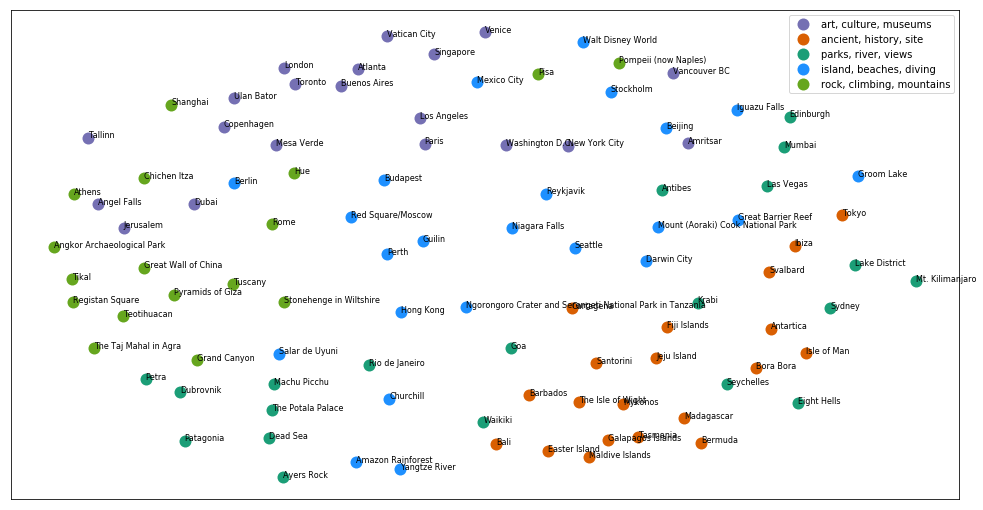

In [23]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, place = places)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['place'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)

In [24]:
plt.close()

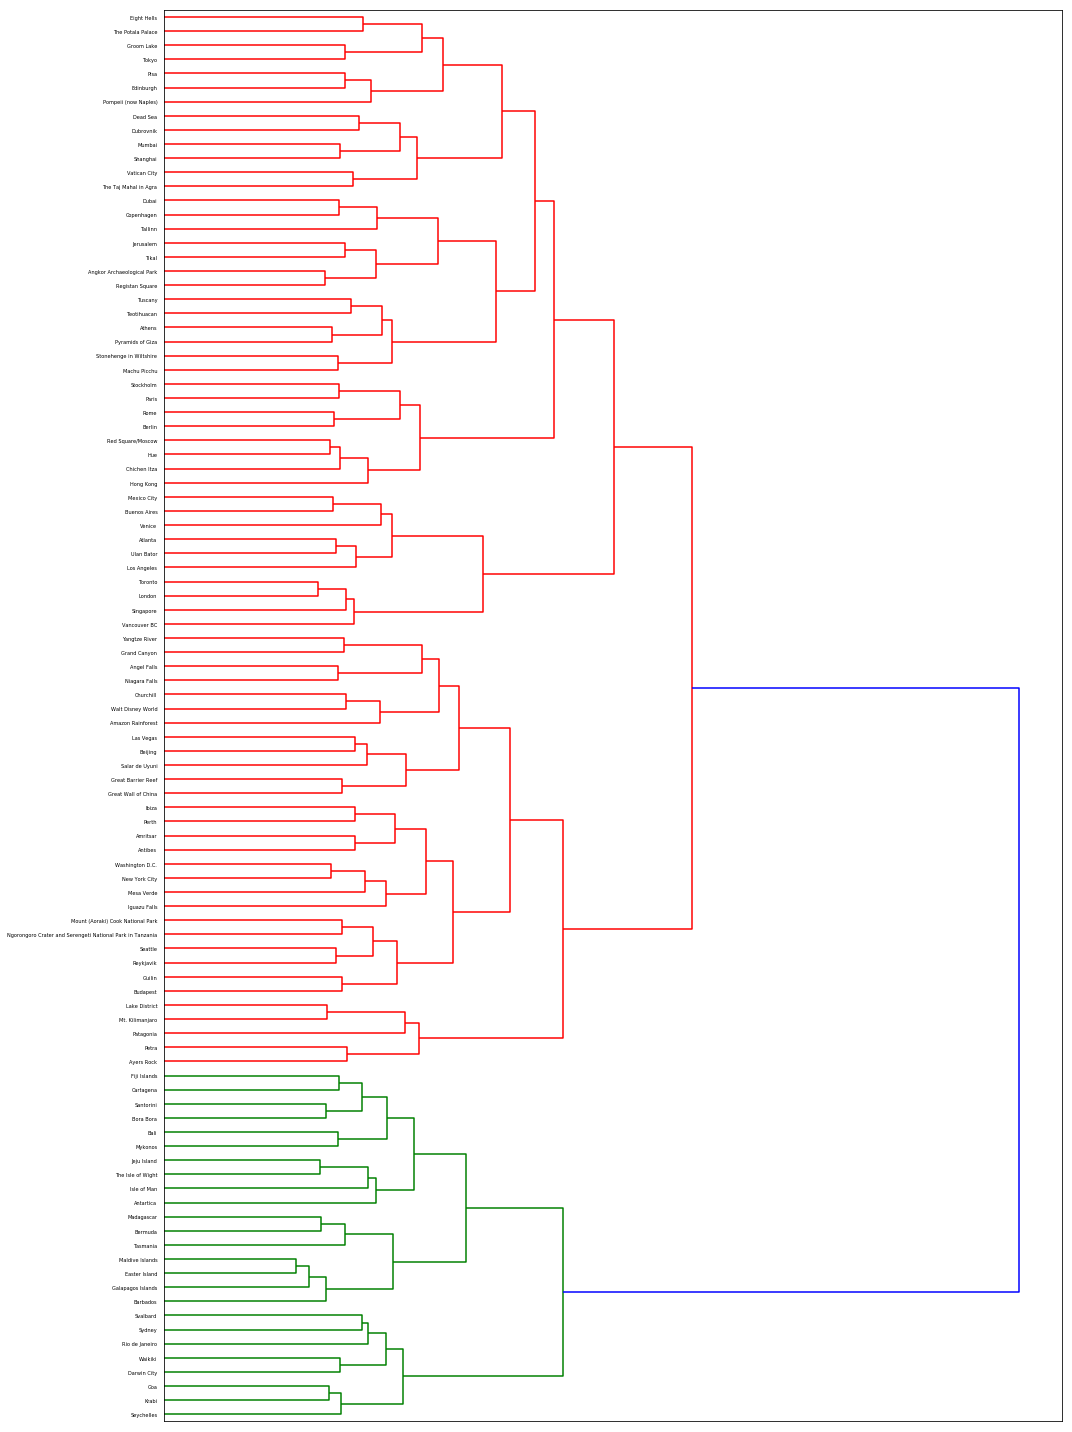

In [25]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels = places);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [26]:
plt.close()